# Week 4

### 01 Assignment

[The assignment can be found here.](https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/04-Exercise.ipynb)

### 02 Status

I completed the necessary exercises.


### 03 Solutions
#### Exercise 1

In [1]:
# 1 - 2
import numpy as np

filename = '../data/befkbhalderstatkode.csv'
population_data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(population_data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [18]:
# 3
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
dd = population_data

def get_pop_by_area(neighborhoods, mask):
    sum_of_people = {}
    for neighborhood in neighborhoods.keys():
        people = dd[mask & (dd[:,1] == neighborhood)] 
        sum_of_people[neighborhoods[neighborhood]] = people[:,4].sum()
    return sum_of_people

def print_dict(dic):
    for key, value in dic.items():
        print(key, ":" ,value)
        
mask = (dd[:,0] == 2015)
print_dict(get_pop_by_area(neighb, mask))

Indre By : 51937
Østerbro : 75113
Nørrebro : 78802
Vesterbro/Kgs. Enghave : 61623
Valby : 51727
Vanløse : 39537
Brønshøj-Husum : 43908
Bispebjerg : 53604
Amager Øst : 55205
Amager Vest : 64967
Udenfor : 3872


Text(0.5, 1.0, 'Size of city areas')

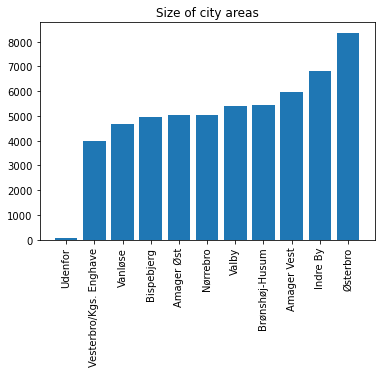

In [16]:
# 4
import matplotlib.pyplot as plt

data = get_pop_by_area(neighb, mask)
population = sorted(data.values()) 
areas = sorted(data, key=data.get)

plt.bar(areas, population)
plt.xticks(rotation=90)
plt.title("Size of city areas")

In [14]:
# 5
mask = (dd[:,0] == 2015) & (dd[:,2] > 65)

print_dict(get_pop_by_area(neighb, mask))

Indre By : 6818
Østerbro : 8370
Nørrebro : 5059
Vesterbro/Kgs. Enghave : 3984
Valby : 5397
Vanløse : 4668
Brønshøj-Husum : 5461
Bispebjerg : 4945
Amager Øst : 5027
Amager Vest : 5971
Udenfor : 50


In [28]:
# 6
def get_elder_in_nordic_countries():
    nordic_countries = [5101,5104,5106,5110,5120]
    elders = {}
    for nc in nordic_countries:
        mask = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:,3] == nc) 
        temp_elders = get_pop_by_area(neighb, mask)
        if elders == {}:
            elders.update(temp_elders)
        else:
            for key, value in temp_elders.items():
                elders[key] += value
    return elders
    
print_dict(get_elder_in_nordic_countries())

Indre By : 131
Østerbro : 111
Nørrebro : 57
Vesterbro/Kgs. Enghave : 43
Valby : 41
Vanløse : 28
Brønshøj-Husum : 43
Bispebjerg : 45
Amager Øst : 41
Amager Vest : 66
Udenfor : 2


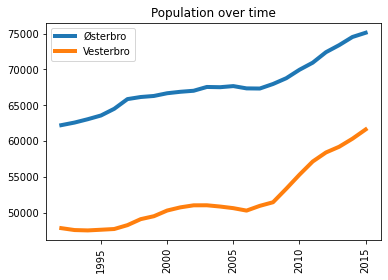

In [17]:
# 7
city_østerbro = (dd[:,1] == 2) 
city_vesterbro = (dd[:,1] == 4) 
set_of_years = np.unique(dd[:,0])
østerbro = np.array([np.sum(dd[city_østerbro & (dd[:,0] == year)][:,4]) 
                      for year in set_of_years])
vesterbro = np.array([np.sum(dd[city_vesterbro & (dd[:,0] == year)][:,4]) 
                      for year in set_of_years])

p1 = plt.plot(set_of_years, østerbro, linewidth=4, label="Østerbro")
p2 = plt.plot(set_of_years, vesterbro, linewidth=4, label="Vesterbro")
plt.title("Population over time")
plt.xticks(rotation=90)
plt.legend()

#### Exercise 2

In [11]:
# 1
import pandas as pd 

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)

In [5]:
# 2
demographic_data = np.loadtxt('demografic_cleaned.csv', delimiter=',', dtype=np.uint)
print(demographic_data)

[[    0     1     0  2008 32976]
 [    0     1     0  2009 33656]
 [    0     1     0  2010 32435]
 ...
 [  751     2   100  2018    18]
 [  751     2   100  2019    21]
 [  751     2   100  2020    23]]


In [7]:
# 3
city_data = np.genfromtxt('../data/DKstat_bykoder.csv', delimiter=';', dtype=None, encoding='utf-8')
print(city_data)

[(  0, ' Hele-landet') ( 84, ' Region-Hovedstaden') (101, ' København')
 (147, ' Frederiksberg') (155, ' Dragør') (185, ' Tårnby')
 (165, ' Albertslund') (151, ' Ballerup') (153, ' Brøndby')
 (157, ' Gentofte') (159, ' Gladsaxe') (161, ' Glostrup') (163, ' Herlev')
 (167, ' Hvidovre') (169, ' Høje-Taastrup') (183, ' Ishøj')
 (173, ' Lyngby-Taarbæk') (175, ' Rødovre') (187, ' Vallensbæk')
 (201, ' Allerød') (240, ' Egedal') (210, ' Fredensborg')
 (250, ' Frederikssund') (190, ' Furesø') (270, ' Gribskov')
 (260, ' Halsnæs') (217, ' Helsingør') (219, ' Hillerød')
 (223, ' Hørsholm') (230, ' Rudersdal') (400, ' Bornholm')
 (411, ' Christiansø') ( 85, ' Region-Sjælland') (253, ' Greve')
 (259, ' Køge') (350, ' Lejre') (265, ' Roskilde') (269, ' Solrød')
 (320, ' Faxe') (376, ' Guldborgsund') (316, ' Holbæk')
 (326, ' Kalundborg') (360, ' Lolland') (370, ' Næstved')
 (306, ' Odsherred') (329, ' Ringsted') (330, ' Slagelse') (340, ' Sorø')
 (336, ' Stevns') (390, ' Vordingborg') ( 83, ' Regi